In [1]:
# Multi ROC Curves in one Plot to compare Classification 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve


In [20]:
#using a diabetes for example
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# setting the X , y 
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [23]:
#Split data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# define models
lr = LogisticRegression(solver='newton-cg')
dt = DecisionTreeClassifier(max_depth=2)
rf = RandomForestClassifier()

In [32]:
# fit the models 
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

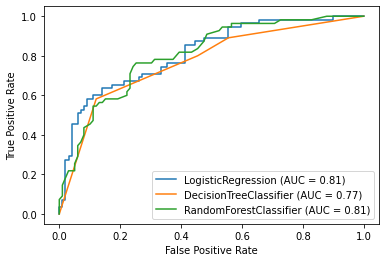

In [33]:
#Plot ROC AUC
disp = plot_roc_curve (lr, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_)